In [45]:
import numpy
import matplotlib
from scipy.optimize import curve_fit
import scipy.signal as signal
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
data=loadtxt('1605a.txt',skiprows=1)
shape(data)


(102400L, 3L)

In [47]:
ix=200
iy=512
x=arange(0,200)
y=arange(0,256,0.5)
shape(y)

(512L,)

In [48]:
512*200

102400

In [49]:
z=zeros(ix*iy).reshape(iy,ix)

In [50]:
k=0
for j in range(ix):
    for i in range(iy):
        z[i,j]=float(data[k,2]  )
        
        k=k+1
 

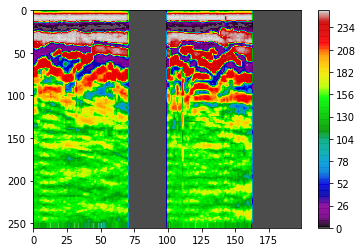

In [51]:
ylim(255.5,0)
contourf(x,y,z,256,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()

In [52]:
# convert signal from logarithm 

In [53]:
capatmp=loadtxt('capa_3.txt',skiprows=1,dtype=int)
capa=capatmp.reshape(256)
len(capa)

256

In [54]:
znorm=zeros(ix*iy).reshape(iy,ix)
for i in range(iy):
    for j in range(ix):
        znorm[i,j]=capa[int(z[i,j])]

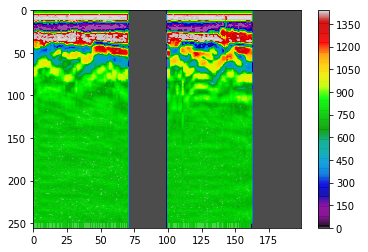

In [55]:
ylim(255.5,0)
contourf(x,y,znorm,256,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()

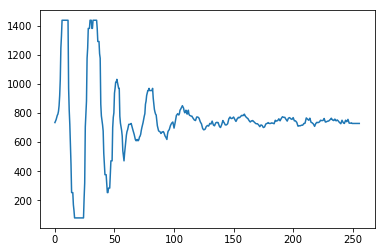

In [56]:
plot(y,znorm[:,24])

In [57]:
N=len(y)
freq=1./float(N)
zf=zeros(ix*iy).reshape(iy,ix)

In [65]:
# First, design the Buterworth filter
N  = 2    # Filter order
#Wn = 0.01 # Cutoff frequency
Wn=100.*freq
B, A = signal.butter(N, Wn, output='ba')
for i in range(len(x)):
    tempf = signal.filtfilt(B,A, znorm[:,i]) # Second, apply the filter
    zf[:,i]=tempf

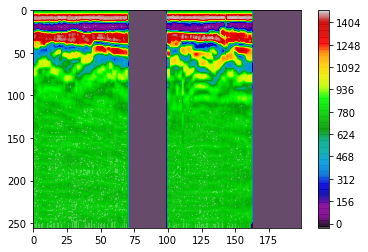

In [66]:
ylim(255.5,0)
contourf(x,y,zf,256,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()

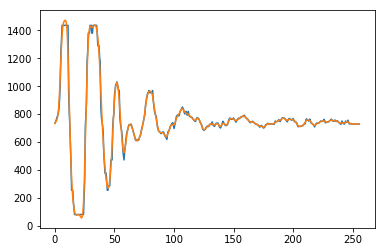

In [67]:
plot(y,znorm[:,24])
plot(y,zf[:,24])